In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
cividis = mpl.colormaps.get_cmap('cividis')

# colors = viridis(np.linspace(0, 1, 5))
vcolors = viridis(np.linspace(0, 1, 5))
ccolors = cividis(np.linspace(0, 1, 5))


colormap = {
    "NoOpt": ccolors[0],
    "+CP": ccolors[1],
    "+ResPurge": ccolors[2],
    "+Dyn": vcolors[3],
    "+Sel": ccolors[4],
    
}

/opt/homebrew/Caskroom/miniforge/base/envs/dsched_plots/lib/python3.10/site-packages/brewer2mpl/brewer2mpl.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [3]:
def to_ms(k):
    return [x / 1000 for x in k]
def to_s(k):
    return [x / 1e6 for x in k]
    
timings = {}
time_convert_fn = to_s
timings["NoOpt"] = time_convert_fn(
    [533620,568864,1301351,593600,833568,3309493,1908944,1277832,1474636,2296192,1760147,1278621,1583216,1903928,2112719,1566940,2808745,1320146,1325821,2550537,1564140,1503725,2019126,5835937,1924649,1946413,1929652,2407248,1246973,1683886,3873124,3421343,2052563,2009481,2125765,6100730,2784300,1918378,5098904,2856432,3409624,4805882,3111299,2226848,2239316,2188784,6376710,4241900,2649876,3532000,3488258,60104412,60269004,60281796,60192210,60158727,3867822,3755041,3445536,4979203,1892622,11261681,3851158,5629897,3894581,60176516,60924547,60093848,60417789,60284751,60076596,60120349,60243280,60097741,3131712,2791080,2777884,2008165,2389434,2930844,60116273,60065095,56490220,60603773,55580239,2680292,60072009,60133067,58790284,1917244,48568465,58902217,3494055,52522355,2838346,2547640,9446367,3865270,2342596,4792292,2422115,2802625,2749716,2949733,3578123,60100246,60121008,60417826,60150019,62017594,60192790,60230417,60327455,60238372,60294592,60287000,60065265,60265020,60050163,49420600,3887474,2125185,3181039,3236818,2665982,2922891,7522586,4718891,2804064,3314108,2248503,2760441,3138695,3227673,1677032,60068444,60069022,60109153,4212718,2356123,2968281,2592216,2847404,1935055,2387586,2096954,5010054,3246620,2602004,2497151,4456920,2033545,6257555,2294304,2587372,2511694,5294269,2782011,6090452,2078865,2924919,2364794,4123820,3261059,2777960,2913159,2813248,2685497,6198251,2028887,4848748,2540128,2884913,3561094,60145641,60492798,60063719,60209832,4046374,60192751,60162272,62232838,61055432,61388710,61005258,60173204,60069476,60066486,3358619,1794147,2755633,2126772,4236141,3471214,2453101,6629092,3578126,2271249,60071444,57022273,2560129,6820715,2852853,3252932,6925541,2172528,2432442,60652676,60299543,60170537,60952029,60778970,60190619,60084707,60215348,60047979,60060340,61209691,6655154,3938038,4422524,3489556,2986347,8313287,3026690,5442390,60133046,60101700,60102622,60113885,60305112,60085938,60187711,60125224,60061548,3083828,2889359,2995508,3586639,3105876,4745807,2263715,3825477,60330933,60191040,60316941,60126765,2391815,60520708,60061496,60328166,60100899,60271215,60111089,60190488,60304660,60519926,23501514,2846238,3754728,3021208,56295698,60399594,60105389,60194652,60423400,54796256,4085884,3190725,2364900,2517626,1936349,60061476,60030726,60074473,60054972,60059083,5006433,60308929,60391559,60077267,60313235,3011858,2492257,3432152,6130794,2140377,2975261,3239603,3861381,2559176,2788664,3928563,2541603,3770835,2700065,6289025,3380848,2459073,2086187,3179612,3465793,3623508,2603988,2267918,60188900,60130484,60056475,60060482,60259598,60051880,60062290,2221974,6052006,60574962,60072794,60050533,4828726,2075450,60148768,60313850,60099892,2166175,4371431,2180756,2285303,4860090,60055647,53854802,1590203,60094748,60057479,61190562,60054241,60084688,60067321,60077831,60065231,36416716,3358696,40455970,2101830,54631542,1958301,3355047,4066846,1460422,4560093,2312555,4001336,2432455,2918521,2539327,3432649,4877757,4132429,2653754,2042772,2483519,2594251,4539373,5385094,4096246,2239661,2442641,6938199,6157816,8621383,2821023,2674993,4501212,2071007,60176691,60311167,60133937,60212355,60836007,60054711,60277577,60295587,60176362,60061304,60071860,6181016,2760666,3636546,2022725,2477887,1936349,3626899,5012913,3015179,2811853,3395413,7625757,6954196,60101584,60438599,60118170,60429104,60245656,60220069,60163459,60371044,60387623,60083721,60092034,60065914,45656204,4193311,4090750,60151756,60055024,60206177,60291208,60407197,60437971,60524214,61782118,60181385,4483944,1996421,1747307,2363692,2450352,1765827,1726030,3532987,1894352,1648419,2192525,2177042,2176205,2969422,2823739,1952954,2637576,5388821,3055820,2945102,1872621,5635621,4203285,4218885,2742872,3474893,2501247,2877436,2598291,1885323,2565029,3157789,2831498,3068571,4703162,2943332,2449343,6417013,3749386,2354253,2437310,2834118,2665837,4065633,60304170,60749350,60371474,60250133,60325036,60189224,60094861,60168051,60144265,3738629,2043119,2062858,3327468,3292010,2545256,3406570,4616872,2766970,57082561,2259673,2962143,17810873,2790023,3732635,60156859,60236322,60368895,60143247,60195080,60845658,60137647,63858002,60912393,61359101,61370595,60482914,1868179,60156698,60549869,60251850,60271270,60581230,60142410,60036621,2450962,1724069,60176352,60053362,60047787,60134521,60089570,37401257,2113917,2384481,1868519,1783796,4751898,3288856,2126723,1942819,2834032,60052308,60052243,60159333,60070598,3734076,2138323,1960213,2084392,2634547,5983335,2284261,2624393,2219631,3192305,2859152,6017232,4884064,1890496,3105649,2864198,4521905,60184426,60210409,60399005,60211876,60992604,60123037,60054392,60351233,60169079,3539930,3689937,2133499,2485729,2784915,2367773,3055797,3356823,3704076,2414468,3958543,3518975,2409008,3895153,1961929,2472190,1905486,5897352,2667560,60382905,60271440,60189266,60321250,60066071,61461638,60070960,2969738,8073948,2005352,2081526,2492899,4890603,2561424,2902345,3498213,2679680,2502949,2250253,4893193,6034029,2433764,5056728,2078468,2695151,3711814,3013006,1809045,3073855,2225285,1863019,60064265,60235903,60283518,2364787,2340023,1855706,2221028,2244911,2481871,3151195,3713102,2076156,2593381,2358953,2823204,60158912,60245547,60826601,60128506,60054746,60109797,60251575,56068782,2456720,2095501,1826849,2626415,60091092,60263346,56680411,2308399,2006698,3309123,2308143,2659470,3608312,4070172,2203652,2140986,3032039,1435481,5075157,2368091,60069623,60127488,60046666,60130254,57825856,54679396,3107920,2453834,2591322,5595491,1663562,1527025,3070532,60056735,60106863,60091125,1653821,3041371,2069973,4720321,2580098,2131693,6682466,2734994,2573308,4161389,1544138,2315736,3353579,60141699,60100080,60540249,60116740,60377658,2296957,2234115,11310932,5588636,2555028,2448897,2168150,2014414,2431040,2029637,2703101,34297187,2835805,60114880,60093157,60127062,60145439,60193981,60139677,60432745,60196431,60382204,60171391,60144593,60082417,60059275,60210224,55309643,1344724,60202811,60216449,60127615,60099301,60126423,60175729,60133048,2113671,2448018,2798557,4177315,4792659,2434967,2213930,4358757,1734725,3252848,3176246,2851656,3509012,3557761,60344235,60152109,60154181,60267268,60187005,60359868,60139249,60080411,60092336,60292217,60166560,60107778,60064802,60227943,60074336,60116729,3908209,3724130,2907373,2720546,2041460,3385509,2782503,2818258,1880407,3489335,2452624,3001542,2432588,2451093,2026519,3821099,2511490,2980594,1795903,4720340,2522645,2183769,60089580,60142780,60090407,60080046,3782405,60107679,60168845,60107795,60156187,60392818,60062412,2429914,2631630,4208661,1875715,3387874,3186912,5852339,2996217,4939106,60097527,60119061,60360040,60171508,60197564,60246012,2133770,5100559,3192194,60238149,60316931,60271404,60260534,60176062,60256148,60106646,60117669,2460424,2478554,3126470,3192400,3916783,60126203,60094161,60129629,60215385,2136774,2236807,3218375,3433359,2225579,2079936,1539170,4423817,2724853,2067405,2448685,5444940,1739111,2472366,60157701,60063752,60123708,60060342,60065099,60041624,60117922,60091356,60061447,60049503,38724675,60088240,55199348,1581358,1564121,1420170,2055302,2090363,1906808,1947166,2276231,2241546,3481101,1734367,1596588,60078218,59073768,1280227,60053437,60062391,60061270,60093801,60060961,51443939,42965982,1865711,41251490,1603431,1428873,1951047,2680673,1797208,1593826,2942635,2015544,2333258,7508992,2287051,2547779,2036661,60090956,60165959,60064485,60166274,60129020,60213663,60233324,60066134,2853097,2666168,2550724,2901757,2473847,2130240,3288154,2301920,5233066,3089038,3910569,60116533,60364031,60722576,4199733,60152584,60135195,60278039,60157772,2299017,2738628,2507497,2681114,2699462,2857053,2341211,2171975,2484841,1970541,2175734,60119809,60126685,60221384,60161304,60178759,60114507,60130230,60125455,60559490,3778017,2105733,60182414,60197570,61192839,60072652,61224765,60069709,60070416,2118135,2004909,3147453,2025197,2446849,4010563,2129053,2628296,3058689,2228416,2228563,2468197,3092757,2157339,52456468,2804096,60238772,60173331,60172585,60096170,60238347,60249382,60284011,60063341,51996967,60190847,50793410,1866875,60070640,60054259,60059490,60057976,60078506,60088428,60052690,52240477,1795877,44948455,1969080,1676990,1739053,1624597,1626685,1148190,1034654,1922601,1103682,1108216,1481632,1641307,1177453,1353032,656463]
)
timings["+CP"] = time_convert_fn(
    [149169,254320,404862,227807,321920,1174455,999101,920103,685433,680251,1087013,1041295,700051,634263,1067061,798586,752179,583894,572293,1250099,673936,998808,1176775,3359219,901454,660708,1217321,1025295,1215191,678691,1265426,1936193,832372,510463,740468,2850647,1390062,964132,1179851,1290636,3069198,1802302,1542443,941391,801861,1138354,871648,1907725,2120678,1437377,2153328,2871845,1658885,1564183,60060977,40941854,1340954,1669916,49998716,18329360,1065751,2401565,1276442,3403363,1764320,60231859,60316413,60103372,60123058,60046173,60247599,60243493,52684258,2039641,44013348,998179,1736354,41550426,48584125,1132613,48118854,10719503,945889,13723838,1418154,1156645,12693172,917108,711539,1272111,8348289,1994110,1017599,1046838,722476,2035635,7164548,2497039,567383,2164316,1615838,54992598,22845408,1208276,14196518,16847547,2672676,47452804,1103179,14953292,1736561,1375333,19594197,16214828,1339375,18265567,17403118,14725966,1289829,4641847,2290295,1700610,60278282,60156263,60050997,60057019,60089095,60172500,60112602,57431238,60070130,60056677,59708417,26152709,1163716,24679561,14318675,2052305,20149831,1216796,2304021,1154842,1260656,2028047,820999,19569295,3296818,1906568,1745733,13534369,2457176,2134646,2993685,42447156,1233818,56265020,4323820,1191695,2717482,2092439,1586510,1812259,3111769,2057822,60053610,58186611,2157913,43307703,1292592,1219190,2207557,1737035,1639385,898236,12120220,1038212,1097037,1134906,1854256,60214564,60118450,28937956,25134125,12824643,2679430,15741792,9947555,1557342,938658,1425237,926906,10060649,1383625,10361485,1516766,3598384,12515866,1117342,14924277,13040365,2214874,60266430,60180131,1971610,47617370,12915786,13320484,17603643,13363350,811651,55716868,56738625,60059777,59650116,60265157,60335284,60179375,60057593,60095478,60076837,60065295,60070918,60070899,60072214,60131942,60166456,60196734,53012890,1222547,44139466,1219607,1320582,13026058,2148260,1542382,2283648,15887304,1689451,18233916,1903978,19416459,20055752,2736920,18738572,1515719,17385994,60060422,60051256,20535065,60562097,60040143,29052565,60311447,60556782,43351335,44558138,18471825,13051167,14392735,3335484,1890181,13266015,12592501,1464456,14335184,10252815,1775545,13566891,24817166,20687247,12186988,11257849,18301986,19064659,12290471,12670817,10504115,2847471,716888,2441850,1738167,923132,1189733,10189499,1861241,3357802,804877,800673,1942032,1847397,1420510,1321594,1157593,9481274,1168315,1525491,2730411,3938959,13463308,2113200,1851122,17837937,1107112,2501764,1109464,16045317,1807286,809855,996210,1025980,1118807,8014965,1457200,2684509,14151699,1100668,1310563,13577974,867390,15377876,1418524,58395095,15750505,1008339,13609958,10856326,1448979,60210279,60478604,60093001,22852704,21811981,19164046,56238334,2060789,1276409,950098,11542986,1075708,1631450,1058792,1691034,827109,9137271,14722909,1191459,1171759,3678030,1678297,1424392,1020381,1119311,1840309,1230949,829339,625547,816054,1144372,560061,1127446,726495,1074201,1833008,930361,741622,1752654,996606,13622216,1140954,854151,2104521,1235066,39221989,1784031,2388934,49352142,15191691,1224315,16096732,1041339,1051643,1009446,1130421,49981921,1587121,60254030,14100530,1431566,13052569,2264985,3109326,48549179,1775501,1838229,17713997,56361867,19335951,2208783,2781772,60052895,37066777,2490252,60040778,58791935,60068159,60043875,60053690,60105150,18935075,1274756,2982204,60232105,60062787,60057328,60516142,60051719,60082448,60064581,60061233,60100324,1745908,992717,1095049,936971,1074650,821078,739057,1399107,1502042,1171169,1104194,778955,1044859,942485,894178,1797139,729770,2421021,1096721,1778838,1593558,2842624,1555408,38806586,1442792,3478708,2028917,1159461,991098,883728,1009469,1503382,1386317,1231400,2245459,1204315,751532,3872896,2326730,1735326,1038310,1084988,1297497,1131714,2798080,1837759,2893672,60139038,60059327,60109297,60795980,60110733,60518772,2640466,1061132,1507894,4838854,1344517,1662221,1596288,1826119,1755034,1532456,1845784,1358685,8153179,1621991,2035657,1639784,3425327,2220234,57318601,2998256,20411823,1185156,60377103,60134728,60093285,60587950,60251937,19368306,20598505,1015022,930417,21478347,14863954,3968376,13552280,57218695,1470721,60069578,60036842,60312374,60086375,60049141,21329973,16312217,2053094,1217854,13559592,60075200,60051279,60193697,60035716,60411194,60378806,60093918,12683463,1822421,1700822,1290099,1076224,736116,887403,3390227,1121739,1527207,769796,1394776,1097823,5810550,22418692,1356976,2168378,1721231,2566738,55989077,1292274,48031367,51629636,1978879,53901591,54331059,1293968,1674706,1409702,1849951,1200813,915711,2092658,938358,1373652,1096584,1443064,1082084,874508,1613095,1147580,1502242,1112493,1069642,875883,3525422,1232437,1985272,40164906,927413,47385837,35797581,972160,42406917,1431609,60221910,60090550,60040628,60492074,10056438,1400576,2070393,10663838,1260977,1561184,20791992,1630472,7090472,13959094,6232946,1304464,1546848,1224256,1048334,1813723,1492573,944182,1341029,1746214,1489467,1393275,1595854,1426620,1026266,728114,1657937,1197096,1329527,1756919,1814869,1488926,1780499,881071,1076354,1611802,1184188,7465830,10680967,1604863,1307771,1451334,1164447,1488116,2033081,13697923,12025416,1764720,1424167,1382995,1529897,2789580,10462670,1469664,2293900,1688673,1528254,1130376,866636,11131635,5802121,1518255,12481376,13303457,1460203,30050678,13824528,1848548,30020644,19976731,60072341,60068415,60032977,60129572,60409752,55270011,61613729,12099806,680067,2010955,1549625,1839277,1618007,1242204,3247675,1148327,1442057,2618227,787841,1565472,1707117,1030747,1788826,994021,1267077,1598295,891707,1373027,4682519,2643764,1443942,1230156,1428191,1462815,42351414,1102978,1532503,60111632,60270392,60092443,30998879,35117441,921908,2156513,1099219,2089679,1530667,1583338,1978740,934552,1529097,931951,1157557,512917,875848,5806455,1155076,951920,1229735,1168500,1338920,1583812,722906,9430994,2062907,1625214,2362372,1437872,1227340,2738994,1564372,1140914,1435739,1068350,1738734,2077515,48683794,45968111,2227259,60068823,60533477,60086946,60553144,60657194,60097958,60063674,60148222,60068792,28647925,27314477,1938013,1040896,1498371,3401466,23907635,17429526,1800097,2023344,1363302,1384689,785797,1124346,1276205,803294,1014611,663824,695761,1592594,1696455,1342369,993478,1837452,714702,784638,1261499,1244747,2749487,1013749,2098309,659277,2692771,15483953,13262334,2784524,2171470,1424574,16854335,1170005,804209,1687985,4370841,3428697,43853165,1915694,58586884,2525368,1521012,60342872,59812409,3304894,40654385,4420001,60069768,60079879,60053604,56845212,2596306,60111396,27974765,1634847,1989427,1691689,1391724,1298168,15978072,1699641,2127281,2568860,1307205,45752911,60060716,60204388,39044316,1309460,1152691,60044901,60124680,60149582,60073106,49233207,54088913,60055249,60057369,60085352,60364836,60472303,60075599,60275359,60054703,60521045,60076843,42574781,60040195,14350684,60308199,24015674,16231329,609909,822514,795910,1499855,1150615,9456021,1239483,1478200,8050664,2119370,1085267,1969826,11006017,936455,1025769,9320631,4878192,1057996,11355128,10904298,2824673,11126687,1535255,13485644,1339027,1101165,2076543,2976372,1476138,48628384,1848085,1639858,45444703,60065792,56529691,55223203,53364222,60169486,60297108,60914986,60050806,60057463,60073271,60092718,60063044,28572872,40039968,1372469,30251203,19679738,24162961,60122102,16728805,3650254,39015611,2656579,23914224,52697223,2241227,60051602,51529598,1741125,23806741,3299130,1417795,2293170,1823740,2035760,2103522,3287452,2652531,60228875,60046636,52566215,60045434,60072599,60094126,60377145,60087114,60069110,60079037,60315843,60086158,50545598,2600096,1159788,28178448,60069086,60215652,60069178,60059403,60064309,60199966,14878441,1341115,1954851,1694976,1893423,1893132,1601740,1962579,1183879,867531,1429117,60132944,50803490,35839395,11477874,1950252,55766279,60056598,60066130,60071213,60085299,60051021,60062900,20098266,1104576,41017027,52879572,1346354,60073174,60077750,60075647,60070456,60100268,60042293,34600225,624310,11892667,59457302,1038350,60136622,12773995,60038734,10923608,607530,1074692,1152077,768782,727018,1053606,699972,868705,921222,559552]
)
# timings["+ResPurge"] = time_convert_fn(
#     [78352,28984,147702,54377,27460,285148,350842,98197,166856,78683,623951,472440,551365,572084,836483,490835,792278,172298,394271,832823,331732,993039,582232,2933471,531839,835700,923282,180828,137917,168869,863208,857788,972220,762336,699689,1134436,948600,736924,1091860,846545,711776,1962049,1049283,780418,794185,754800,661415,914716,1155649,657966,975852,2206947,1950728,1478709,843502,60130338,44086108,1102307,60178259,17987353,825280,1872358,766477,919659,2691811,1199824,50750534,56724712,60054247,60049867,60067000,60062748,60057673,60260183,60078507,60432676,43057743,60072208,60359062,61434481,60042466,44655597,31592858,60085413,60078261,28602223,60034750,13888836,408786,377217,448289,2786222,1786058,674931,1521178,549760,3275374,1850596,1261039,2035757,1190915,962232,621261,1296129,12394414,12931709,643964,17600290,908862,874510,12710213,714610,46435818,14916850,845857,17148227,13612122,12568685,879478,48571333,1209254,50098817,45104249,670214,42129288,942720,60221463,60219935,34286985,60088531,57746009,1473324,45962392,23529448,956432,933617,15831496,1245617,14552120,1230429,1171472,10868898,902434,876418,11640024,775208,735394,1228753,898503,13646206,1112216,801275,3664559,15149460,674756,1158494,2689301,1100645,2136182,1596464,1499383,1033220,1477335,2565065,48744786,1279654,1255257,36178789,856855,855696,971612,1086136,931112,674637,12150391,1208287,2347533,2014481,2412743,60256468,34833880,27992688,22744356,13991290,1234174,11244520,9939132,843766,11361710,10220441,2095302,8999080,11622097,10900886,725359,20470895,14183701,1934820,19008323,12790020,710696,48070630,43261834,855008,46410791,12342397,1326095,22793660,14669618,9288299,16265061,31380327,53663186,1148464,37943719,45067675,936057,50997397,37950970,1180953,35014222,58518350,1217936,60059128,60533319,60045009,60106031,60056464,51093784,37198224,38105622,740040,39131355,1847810,1802123,26494465,44334282,569340,45409497,1206293,15286270,11035354,1281461,60036684,60228654,60307676,16849450,929905,885832,848985,1390557,11841690,9724626,972259,9546892,913939,29011902,18321312,27720981,13612546,1103485,14464960,12274896,12844953,16735294,894449,487177,13967491,19114962,580304,20616460,9939056,10030666,10477533,10643824,8188552,11656633,15339607,10492590,506440,898409,9455342,935561,8784688,11764680,1159272,25881317,8761427,783017,13922364,970078,1038950,1548893,1267567,1136520,6149831,1574470,1814565,7697597,870813,930033,15736872,16711778,628552,708581,15497684,1504337,13658528,930216,884369,619528,5088563,2767351,2966663,11110950,976235,11890529,1080706,1389935,13819899,1244386,56069112,60266627,14562590,12793432,12995229,790622,35485106,12638813,12301649,60038578,60033530,9847042,11419339,28809344,1047224,1417418,499115,1086274,1302426,941115,1004628,496186,967422,854414,1237252,661528,4957797,897913,1167716,867269,616447,1701087,785566,640865,1028217,1266892,1049136,697122,7967282,1853076,1363158,2280798,1130241,10053541,1266903,1216016,4503402,15067913,891025,961274,1050183,13346498,1240918,806619,500848,14730014,437721,12243647,12639462,685389,722502,11225137,2192000,1261061,60052180,60050542,60198812,53114698,606322,60065896,55956160,11481202,1239615,46024135,22415844,16765335,1071866,789074,39097819,12619404,20917081,53314160,983309,19452394,42523863,1038045,18278828,46140348,29485365,60350523,60090343,1500931,2815785,2100259,1944386,1298543,1666217,2243523,2293501,2642673,1072304,38054882,13298190,1175325,37219316,12191736,420759,1305257,1029752,34402581,33745750,869088,34994621,13360260,638457,12445792,60228020,54184656,1986088,1753080,1373760,1649068,814811,1367875,60160862,49406367,965191,1147736,1227002,1107215,1414704,475782,1882598,849137,1410438,625657,2785637,942981,1408181,745496,1210184,1229749,1631272,2219857,842475,2719588,60122268,34183571,51075864,60605553,60140293,60299309,60078425,60228025,60056763,49317833,1495325,38535750,980577,60282377,43303801,14363015,1041410,1306233,10889461,2147610,1293363,60312996,46409086,60046886,57826632,20657974,22773223,906153,60186542,60233978,60172045,60170250,60125076,20089268,21068115,60431951,25104655,60113657,21164638,17690025,12225866,2983039,980149,61042615,46762705,1772986,40572261,50240668,791296,60097788,53390032,18506899,60218788,60063015,60138522,60051500,60218159,60063124,60167700,34260235,1494946,607601,668181,797866,904717,510681,796855,1301481,921975,750466,1247425,719138,758876,4999416,1677601,1307678,1872025,1253174,868489,2793139,1674700,46068389,44149246,1086599,40461003,44315051,964493,60176979,60106649,60125545,60166342,60075917,60076658,39275082,588868,913573,1115499,1293107,1784402,2291884,1735603,2032554,2433342,1027978,515373,4809317,1750576,40492346,38207692,862077,44748160,42755319,1246192,48777317,1525178,53089010,47166735,1387241,53311687,46253819,579074,51262642,42512650,688685,46944771,56940516,43282104,4714967,14938145,1315900,736719,1275406,1850229,12738638,1029649,1115822,1286069,1195158,18255888,1352667,836284,1030695,999530,707288,847501,1397681,2363405,669526,581399,726313,834930,509325,771940,889664,1064085,880133,2107856,9291892,1186685,8751625,877222,1084070,12311654,452982,11806775,8032105,351547,10361992,29523689,711430,1667317,13154156,814407,23355265,1445901,2366010,14227446,749834,18771286,4103462,1159588,12183346,11838120,1997982,60135479,55765974,21748746,797234,9698964,593109,44098420,32175776,597594,801969,10246138,513299,7025208,5740792,864094,7790429,1427703,646167,541831,3229565,467103,821910,1993160,724430,690926,945375,31946381,853539,1681534,47242639,1618051,1262084,860474,3516857,2096956,876007,1585602,1913025,2322485,1214436,982374,972660,60140815,60517827,60153589,60260564,2950700,1057747,1223683,1884754,869094,691115,1066988,810282,692831,1200189,446438,772473,333568,854810,4182199,968020,580416,1178491,1814696,1903882,814060,949252,13320265,1439679,1058722,2983499,844720,1213929,2853927,1038554,57617703,1001714,1220653,55551710,1199652,37578052,56521005,1257883,60049620,60345179,60661310,60111940,22591736,876677,60112594,60215659,60046877,46474728,25007946,1919032,31889010,32324308,795285,33999389,1020112,1244834,45575703,36020734,780383,60482532,15577570,2415299,11988573,8646953,965811,782148,1325471,1029933,759033,697177,9862631,12680902,950392,16209450,1033223,14993185,13194061,14570578,875382,1183441,13595161,1204096,1598811,2788984,743023,31884061,1191033,1136967,16095128,840082,2904174,57268470,1191242,55579723,2278345,1478742,60052165,60205803,60054508,1102829,1107220,56845453,17678157,1902360,1785290,915295,45752468,40260690,981173,1403803,1128527,627313,1217887,12074528,830847,16669507,1517245,2891512,52765155,50254148,2035861,60053346,60272914,60065625,60065085,15096586,52515557,45588602,1071300,56549548,60063293,60473391,60068904,60055030,60046742,60628645,60066272,60588173,23880702,538827,60543055,60297044,60149213,61507434,6555266,7938376,511303,520168,352905,488600,938661,1046445,766538,1418207,4597143,1352465,749332,744461,1586469,805518,741344,10355237,3268275,1755663,13332532,10357290,1311402,1426438,583167,13868661,8605216,616243,7998735,57441403,1212687,44455299,37717999,728635,31364926,60053474,41925242,55124535,40981095,60651119,60267749,60072427,60269305,60050148,60057636,60063498,50027799,1495257,1530435,1455306,27027339,23751204,585405,24355866,1134287,1239095,20231023,28414682,35663765,60453734,20380924,46431201,48376437,1448115,876336,3122154,1654681,1534946,1320323,1107106,1681264,1543199,1527472,1070833,43669037,849808,35589409,16075351,1789691,58610011,39314067,874197,45765071,60265447,40674955,40031171,60069065,60069289,60071495,60074740,60055957,60177668,60038567,56054957,60040395,20091648,669376,1201267,15446232,14102115,20965568,851178,981860,1516450,1248767,1748677,33919812,15684817,1259082,11261920,1336125,2230575,60074459,60056021,54688932,60439492,60054858,60073664,60054997,60058031,15850920,60050314,60453808,60075370,60046317,60062826,60055293,60070775,60065802,12507202,8470150,10535601,9198475,33006030,31353125,507512,539591,899412,398722,245331,217442,67623,130274,93170,108852,111850,67677,21337]
    
# )
timings["+Dyn"] = time_convert_fn(
    [18240,13898,37623,11914,9044,72444,131859,34670,34507,28785,74844,82295,95520,190654,96483,47157,36284,20314,32929,130953,19763,37090,73938,519212,120671,136464,119971,111485,123693,79591,563753,642543,294383,238267,149238,248544,211376,120381,135807,91407,115607,559471,187764,165483,173196,176367,163312,247283,196849,139655,166526,919525,271948,285369,225650,720407,160671,186617,397424,347475,169330,1434651,173375,223062,415015,416546,307989,336706,5142332,914516,252026,4390552,317418,3739180,5058451,4071342,326694,23975797,60050297,60074954,60075582,60198075,10902789,60063605,5741201,1194928,8161309,1955742,1024929,721481,747369,964240,135417,84798,121943,224591,3731967,269128,117842,723449,294920,601864,387110,726281,426088,694435,220943,229090,144124,1711974,1745046,97527,3090949,4153272,867315,6000657,2996035,2887000,308799,5680803,617380,3580368,543841,590343,6400137,432699,4820303,751919,668786,4864492,4352302,337114,342838,4949363,839678,4174643,2731412,334042,626957,1893806,211229,156929,173297,230604,10343984,2881384,381614,3255259,193809,1518042,182045,224459,2002027,3124261,412506,410660,294467,224478,1301768,784705,282207,213707,328633,695676,2537129,3586976,557285,183786,687610,217402,255700,164215,156370,190012,2299789,188944,156386,2095919,316752,13580772,5789214,5569991,4657681,1542336,283246,2935161,524201,336560,373613,327072,452334,4982185,3281065,2508372,312149,2868383,501119,557237,7577162,4984690,420137,5702225,7544547,3325232,8647257,4388974,729539,8850968,6632247,149689,60211543,14748856,746376,352593,3628511,3431729,188362,3025457,7708047,279170,12177644,42098286,31115371,6543910,60085062,60335311,7550738,2157781,141337,1749702,1295445,132314,4569923,1394089,874553,1706409,118152,111498,731475,65216,833525,1011474,123470,4389259,72397,4114838,831927,108348,5507669,745175,1300916,2967483,7705474,354271,45786761,186969,14186512,1540012,3068302,1026349,195313,2275698,2644073,184384,4814977,207742,224063,2901188,2767627,252790,370249,1407371,1817805,1083541,971862,686053,1389933,489513,3968314,130711,137813,1240375,163447,2294941,157503,201591,3307057,542480,379617,175450,158305,190820,151982,173191,150007,1082912,1291262,266103,1606311,176221,260972,3616394,5622743,602209,748841,3702495,290923,428432,272700,297022,350163,2598344,333500,3876099,4413800,676753,4828073,3089010,226231,2061236,1806198,3383750,2096177,195139,2672994,134365,176410,2312703,161535,152678,3471829,2020717,411246,2785200,413117,745343,454560,4954795,292332,4107378,1158107,161197,132755,1649270,316590,188903,172566,1655881,149892,2427494,435151,311366,569801,3336348,2585615,226887,2052677,287447,306117,218023,207178,2187869,631535,220920,173632,357454,286125,5178928,358299,218296,441276,218856,3687560,441359,741666,621993,3209192,274362,2642902,2131585,2317274,156292,2961586,2560840,1101124,8772717,3123905,211988,8126541,180633,9122037,1868187,2178915,2984586,1701280,2626378,1614188,1709662,153302,2489141,1602083,3775041,2768443,2346331,3209119,6460230,193943,3703117,4521556,101112,16309748,5181228,453057,8287888,7790647,2832834,270488,4170918,257818,230567,771486,481741,4260322,243755,789123,4730413,2438588,175347,385662,138091,2290742,2075833,134496,3207251,3070667,338111,523293,5866308,574945,510864,309048,294741,698300,4358534,543063,778229,368956,508574,216778,191743,1046123,159723,142787,214183,1251491,227390,1209859,999419,180939,188078,630544,265569,250068,234620,1427720,323702,6901157,306022,298259,6280703,435129,724721,488067,696580,8967986,745384,439308,5785021,4351841,840806,512616,848289,6133511,323131,339302,5691231,666314,9217981,1374327,649398,486024,5757578,255149,2064946,3228789,6839019,7968161,3977676,5840472,3472568,216959,15586973,60229248,60618020,23739416,5944688,908218,207272,447510,353927,877318,2837602,322577,2558269,1814004,219502,17559261,2310571,1459166,2023217,9288840,418442,6797774,60140916,60262875,16169673,7116649,613153,470077,296191,326336,3076303,180589,475386,528294,225481,254840,483511,178494,267709,2033192,315115,332279,416168,222162,207984,1402628,334598,3308175,2256057,2368999,5550894,6867078,319093,3617941,3600101,531702,365657,3132653,714270,310448,533999,937991,684492,285263,3690733,349074,238436,470510,139068,144988,139484,1332855,477485,3944024,3152599,406825,2828713,165609,244586,2927398,128142,3769416,355617,514937,3722612,640624,882009,150874,2925269,172782,2350119,2426547,4432572,1014543,6136047,393806,5360049,232582,3443092,1467469,466567,3802413,510016,382469,3782183,327718,416432,232178,164822,158096,161741,206291,105428,132023,159707,108776,180195,114870,289901,201467,198557,130690,491095,2946486,303032,262071,282933,243965,2457154,256065,3458424,3688184,287263,1992940,3231602,205853,3103392,465877,412077,4833325,6103520,366744,3257985,440770,3771416,2301026,801074,548397,4128456,451543,6754174,2176077,5021714,480341,9204627,479934,3051426,11406961,706732,4550005,4307828,5463112,3423489,2367123,204994,5071799,1824829,3981299,2590529,4676862,232531,732393,1608537,434810,623524,3859852,525498,443156,298486,5765223,1895918,909840,488825,703508,1340622,278923,459082,192025,162490,1199294,1692438,274024,3601729,594540,2595696,3396740,3314297,196918,136014,4805817,252913,4006576,7103192,407512,6346487,11421764,149608,60092180,5006618,155897,1747718,192314,161763,852236,2160058,380151,267984,217730,236016,317149,657695,2098104,854762,499168,9068623,758520,6789585,409498,673919,4438270,649871,3541364,4825103,238572,4970635,3133319,3553798,25038702,3575100,60054958,15243363,12652808,27206667,186025,1821055,408629,293533,447788,381016,3966832,286995,262565,520082,497308,309302,2613757,230593,221925,193686,113251,151606,130917,186310,92242,394892,90124,439316,155983,121867,123405,75213,1289747,135315,634909,178105,275862,2384158,328865,189471,2274556,252392,286051,462589,187036,3469563,294991,6172695,3681965,5196178,9002203,661959,353699,8907273,834121,663272,967225,785495,8372231,827541,876365,576285,377373,243895,2856012,3204341,1834771,223693,368923,222044,658389,1207877,2702534,310170,227050,4229335,433045,396529,583712,870889,638727,7113406,644053,6132774,5709876,586056,3136287,5122661,3856603,7581966,21451827,11166134,60047736,60087999,60075371,4525623,60188519,11790579,60083908,54761830,1364649,60172758,12834237,97365,109470,72898,108783,2594484,2653101,270996,814619,179234,341405,198795,250483,382101,2439397,456510,1764338,979615,237563,156065,2155519,539960,1432517,166868,1612548,2059670,209082,2252049,2462542,666249,4818772,3459856,275940,739436,2516032,3124189,3326144,1319262,3549760,415381,3160706,3365221,8052570,7295310,3641234,8116518,8975218,4651156,510271,22438250,50436670,5134967,3415360,45746164,4581105,61890707,60096669,8310098,6617819,5630372,7696303,4416126,407408,2932783,7272199,5082617,8396634,558724,632858,483547,1164827,485665,6218653,378854,335064,1039539,539963,587677,9830274,6467015,7965448,6242393,4038606,1028992,7194265,5882722,337668,9895172,60101875,60309086,6349094,6087341,13504011,6490518,405115,162203,1932346,2303334,3779674,3656972,2448893,3510612,4254618,159597,1625427,7551227,6442505,6712234,6235230,620366,8472332,7137609,536070,5678007,5373021,10067132,7177126,546999,9249873,9578914,7467020,7420712,9767818,354355,3862027,3068164,277757,20938463,9216347,9875071,20350027,41866544,4861624,6799422,5652329,4647156,458270,205839,153453,170484,70428,43712,43926,100971,45895,33235,24566]
)

timings["+Sel"] = time_convert_fn(
    [17502,13979,38720,11792,12920,69178,113763,33983,21607,146193,27597,21595,30448,17909,25312,17843,17340,7164,13834,43167,8487,25289,122387,311316,50176,34574,24787,12297,25857,17419,76731,79298,10445,27610,90798,23699,309443,10346,27193,33957,78249,73845,30744,46096,114375,405363,35392,66213,152721,214004,778900,454161,55928,417900,41389,113072,126800,177994,28196,411633,13250,1029532,35360,54712,391679,91499,766635,650782,1237996,1086762,146059,294153,168148,617467,474520,513893,286052,1693118,3752455,546455,938405,9102164,869957,593520,410725,1248732,1577707,838082,32265,214689,102666,743182,2185412,89511,143655,181875,571981,71360,16649,567567,193999,128680,63472,92622,24210,45631,573411,440913,71486,425308,514139,589109,401842,1066991,1288450,580353,379150,202423,99341,991232,180283,402475,365479,1509807,219107,51765,1159190,470307,92697,348839,1201931,152183,919067,484296,316088,269893,451010,77267,767614,234065,179452,92162,960049,172753,701866,124133,85663,239741,50352,311358,58529,147084,427680,425119,327016,88162,16963,61505,329124,39568,146376,256549,40489,274800,70916,30898,36510,135443,35971,300250,71551,466218,143204,70725,109217,157012,64057,36174,97587,16465649,9104345,1646181,1076227,1454002,57232,281042,83327,38607,766331,370591,154625,136514,98136,378876,518385,656561,45116,313163,399270,341237,143629,213436,292894,516005,303022,259075,200647,58209,1053182,203504,529070,381439,578759,277464,731351,327250,918906,369145,1035051,227651,449163,876198,408326,132082,282560,298964,501084,647961,1973812,1772600,734957,259170,1413450,619089,203991,893679,867479,576887,325381,175773,577836,301632,152834,312604,476197,176471,282424,1016794,352622,797814,2150991,819456,1478623,1164158,825253,1493613,416430,896158,1636281,1366147,386098,1409897,1347722,835697,1811298,119725,370290,169617,573965,444655,547726,315710,155328,64359,202937,330364,123242,537374,212370,1697725,453084,674497,191149,330108,323862,59019,568757,208990,146183,886901,157196,883546,105560,178551,550478,198973,1579981,1470917,589821,302584,387998,1120241,352172,50789,27310,238799,148258,112034,71828,183933,51753,820787,98969,650376,1011121,83163,549823,75816,60390,65909,33562,1542000,420739,285819,760471,649088,396057,1162177,659720,199891,339733,2021402,278753,345786,1404834,247192,165010,470328,243980,683032,1383554,646497,245177,637104,144708,315210,436623,898909,114113,241991,39184,228797,183532,420582,175686,312463,172678,288317,131456,321605,41921,154559,357457,177811,43703,417362,128810,442676,249007,1694915,263926,119776,418280,140714,246294,362877,135343,241340,325022,401719,243066,56592,1032381,666446,680292,535859,378914,219810,218442,383751,1163719,107358,98659,126430,352158,1250392,183136,314643,1326893,641638,65501,26973,396059,86755,52395,356903,114212,139286,35073,39391,167006,90604,218177,130841,262619,93336,39474,229446,65556,124813,225212,57737,31313,57431,20909,137126,245018,11317,187852,74633,188502,61092,32258,412498,462821,44828,70202,576069,1086407,114616,411635,16919,112094,48783,320214,284534,76894,47642,84097,143144,289488,181263,40121,104208,31052,62615,23383,186273,21907,43005,29688,48439,41254,67642,911235,115685,1068789,307708,334613,952678,89433,467333,420646,776651,588218,62165,217775,262349,238606,615815,280489,292638,101252,303466,151031,6068294,252007,599561,473222,1425359,897015,449729,265517,783477,105497,12450361,6888256,1088594,938940,1670704,106904,406442,280919,258781,3312250,1091781,600244,304602,1164300,419227,2105163,1175237,2141033,1276249,3134780,984703,874742,479462,108347,127817,631293,137894,107499,129398,26970,328847,105765,927298,167239,118627,113269,126163,20593,55743,14411,151744,30246,27200,120142,12359,352362,93151,62503,260250,37823,691402,1228057,172863,436009,1487260,635708,458702,1121762,2854436,4756677,1504752,411648,277955,147505,41004,201439,749160,128093,342117,339570,112294,214873,29815,173917,31432,41514,76120,469511,112035,285340,132444,295390,807858,969066,68733,305850,165599,339670,143271,95403,932497,1922866,739387,140939,736592,120767,529364,1706891,2380147,1286027,796834,31457,573909,27825,961941,281346,31488,68701,314836,333160,687591,87010,113750,29105,35416,82012,81777,60484,53994,35117,84312,24091,139386,99487,139729,94682,18914,48170,78015,66952,93377,294913,174784,60339,521459,70873,209466,270498,128190,449955,1841758,688268,1120997,660450,1571880,201719,870642,154997,739409,57976,68646,709081,449486,333785,119059,111916,1485569,159183,124065,460887,29817,36376,475916,549505,103879,47153,160958,905122,157646,141334,702286,133892,106508,20398,39310,170073,35980,34234,279641,40756,707638,216497,89553,27723,127893,210276,102965,138538,132228,123817,340319,33470,74514,63927,554291,93458,18338,107442,6742648,59471,692438,523518,630628,801646,667348,226726,786708,2781620,1175309,1409655,118315,1005846,178459,581847,1161487,10295,288493,66786,19323,413712,96177,49257,29416,91185,52400,289059,140444,452311,29358,65159,543525,158638,288099,370523,452458,132443,90045,823076,173640,483500,3607872,264012,1520135,916533,340153,892139,1524861,1146821,747907,1242019,1008596,683374,386593,93601,98315,91000,373448,454045,479793,49592,151808,849481,41412,80086,118682,59065,87304,248400,87869,131502,95722,304949,342242,48382,33452,176064,107445,421890,90439,151055,68202,202488,76670,349295,100652,296550,388332,521630,118658,22840,260988,309336,511373,419737,53773,180756,857510,398333,1987853,160048,1328387,96759,78191,345193,129456,554027,278237,46566,91764,1163611,60816,368182,419738,71815,158558,339492,147523,456631,128947,77459,998905,91753,186839,228071,187466,194490,454581,372621,1924432,1274018,1491876,1701031,600750,626180,4422966,1052281,196908,2785839,1590328,3207999,5590497,673733,466902,531764,806037,785907,116592,871909,172142,498458,1194440,191842,136081,291712,33983,585919,507781,538220,305595,165401,191935,113588,148285,200943,956088,132771,84211,389828,91599,197418,106100,438783,158630,131027,635314,1240615,663711,315755,1317177,413842,1053324,533409,138297,204015,154190,2030032,190730,452731,4139047,1198488,2228817,1442625,1261558,628046,580712,532731,1338974,77510,3531637,489904,434636,111048,754367,573532,627017,3213638,737417,439241,83283,36474,231914,509102,37341,27609,93541,34452,549144,1344762,134042,90889,177228,245124,47171,198279,69328,556003,475088,67217,355858,363607,23910,280671,456426,82665,203957,1722065,315488,363695,891092,244954,932791,279551,120810,357229,731562,52413,522985,100295,662739,184388,1174283,270651,942789,707954,1035186,1232306,890765,1425912,2592330,1403626,3561168,1205662,767842,1839975,178591,395722,529452,664199,219487,310692,75827,807845,488151,615668,551144,242702,963148,338161,843056,301528,696732,696654,1159109,388036,272086,57697,147086,13729,11942,18248,18140,24978,174960,8176]
    
)


In [4]:
np.percentile(timings["+Sel"], 90)

np.float64(1.1662966000000003)

In [5]:
np.percentile(timings["NoOpt"], 90)

np.float64(60.2504214)

/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_75584/4065052438.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


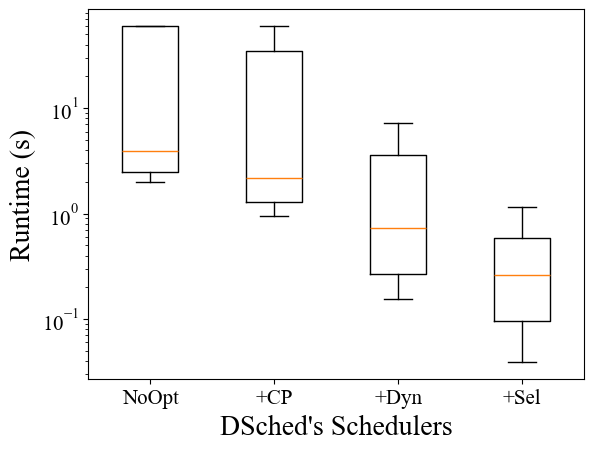

In [6]:
plt.boxplot(
   [v for k,v in timings.items()], labels=[k for k,v in timings.items()], whis=(10, 90), showfliers=False)
plt.xlabel("DSched's Schedulers", fontsize=20)
plt.yscale("log")
plt.ylabel("Runtime (s)", fontsize=20)
# plt.xlabel("Time Limit on Scheduler (s)", fontsize=20)
# plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
# plt.xticks(rotation=15)
plt.tick_params(axis='both', which='major', labelsize=15)

In [7]:
time_limit_goodput = {
    "NoOpt": 
        [881, 856, 871]
    ,
    "+CP": 
        [940, 931, 949]
        
    ,
    "+ResPurge": 
        [957, 937, 949]
        
    ,
    "+Dyn": 
        [952, 955, 973]
        
    ,
    "+Sel": 
        [918, 906, 922]

    ,
    # "DSched Dynamic(1-8) + Sel": {
    #     60: [895, 916],
    #     50: [901, 914],
    #     40: [896, 919],
    #     30: [903, 921],
    #     20: [903, 915],
    #     10: [893, 923]
    # },
}


In [8]:
def getDataPoint(np_array):
    return DataPoint(
        min=np.min(np_array),
        mean=np.mean(np_array),
        median=np.median(np_array),
        max=np.max(np_array),
        sd=np.std(np_array, ddof=1))

In [9]:
final_datapoints = dict()
for sched, datapoints in time_limit_goodput.items():
    final_datapoints[sched] = {} 
    missed_datapoints = 100 - (np.array(datapoints) / 10)
    attained_datapoints = (np.array(datapoints) / 10)
    final_datapoints[sched]["miss_rate"] =  getDataPoint(missed_datapoints)
    final_datapoints[sched]["attainment_rate"] =  getDataPoint(attained_datapoints)
final_datapoints

{'NoOpt': {'miss_rate': DataPoint(min=np.float64(11.900000000000006), mean=np.float64(13.066666666666672), median=np.float64(12.900000000000006), max=np.float64(14.400000000000006), sd=np.float64(1.2583057392117918)),
  'attainment_rate': DataPoint(min=np.float64(85.6), mean=np.float64(86.93333333333332), median=np.float64(87.1), max=np.float64(88.1), sd=np.float64(1.2583057392117918))},
 '+CP': {'miss_rate': DataPoint(min=np.float64(5.099999999999994), mean=np.float64(6.0), median=np.float64(6.0), max=np.float64(6.900000000000006), sd=np.float64(0.9000000000000057)),
  'attainment_rate': DataPoint(min=np.float64(93.1), mean=np.float64(94.0), median=np.float64(94.0), max=np.float64(94.9), sd=np.float64(0.9000000000000057))},
 '+ResPurge': {'miss_rate': DataPoint(min=np.float64(4.299999999999997), mean=np.float64(5.23333333333333), median=np.float64(5.099999999999994), max=np.float64(6.299999999999997), sd=np.float64(1.0066445913694335)),
  'attainment_rate': DataPoint(min=np.float64(93

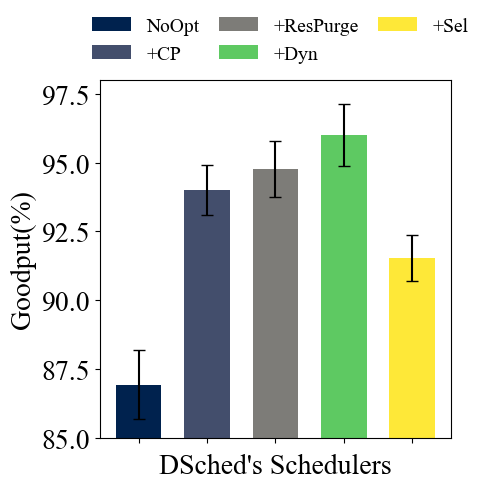

In [10]:
fig = plt.figure(figsize=(5, 5))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
KEY="attainment_rate"
plt.bar(xvals[0], [final_datapoints["NoOpt"][KEY].mean], yerr=final_datapoints["NoOpt"][KEY].sd, capsize=4, color=colormap["NoOpt"], label="NoOpt", width=0.15)
plt.bar(xvals[1], [final_datapoints["+CP"][KEY].mean], yerr=final_datapoints["+CP"][KEY].sd, capsize=4, color=colormap["+CP"], label="+CP", width=0.15)
plt.bar(xvals[2], [final_datapoints["+ResPurge"][KEY].mean], yerr=final_datapoints["+ResPurge"][KEY].sd, capsize=4, color=colormap["+ResPurge"], label="+ResPurge", width=0.15)
plt.bar(xvals[3], [final_datapoints["+Dyn"][KEY].mean], yerr=final_datapoints["+Dyn"][KEY].sd, capsize=4, color=colormap["+Dyn"], label="+Dyn", width=0.15)
plt.bar(xvals[4], [final_datapoints["+Sel"][KEY].mean], yerr=final_datapoints["+Sel"][KEY].sd, capsize=4, color=colormap["+Sel"], label="+Sel", width=0.15)

plt.ylim(85,98)

plt.legend(loc="lower right", fontsize=14,ncol=3, columnspacing=1, frameon=False, bbox_to_anchor=(1.1, 1))

# plt.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# plt.text(0.68, 59, "40%", color='black', fontsize=16, rotation="vertical")
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xticks(xvals, ["", "", "", "", ""])
# plt.ylabel("Miss Rate (%)", fontsize=20)
plt.ylabel("Goodput(%)", fontsize=20)

plt.xlabel("DSched's Schedulers", fontsize=20)

plt.tight_layout()

In [11]:
(final_datapoints["+Dyn"][KEY].mean - final_datapoints["NoOpt"][KEY].mean) / final_datapoints["NoOpt"][KEY].mean

np.float64(0.1042944785276075)

In [12]:
colormap

{'NoOpt': array([0.      , 0.135112, 0.304751, 1.      ]),
 '+CP': array([0.263738, 0.307831, 0.422789, 1.      ]),
 '+ResPurge': array([0.488697, 0.485318, 0.471008, 1.      ]),
 '+Dyn': array([0.369214, 0.788888, 0.382914, 1.      ]),
 '+Sel': array([0.995737, 0.909344, 0.217772, 1.      ])}

/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_75584/1569162055.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right", fontsize=14,ncol=3, columnspacing=1, frameon=False, bbox_to_anchor=(1.1, 1))
/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_75584/1569162055.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


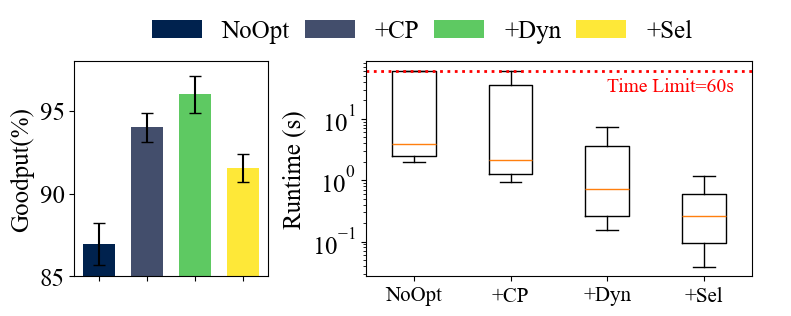

In [13]:
fig = plt.figure(figsize=(8, 3))
# fig = plt.figure(figsize=(13, 5))
# fig = plt.figure(figsize=(15.5, 5.5))
axs = fig.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})


###################################
ax = axs[0]
barWidth = 0.15
xvals = np.arange(0, 4) * barWidth * 1.5
KEY="attainment_rate"
ax.bar(xvals[0], [final_datapoints["NoOpt"][KEY].mean], yerr=final_datapoints["NoOpt"][KEY].sd, capsize=4, color=colormap["NoOpt"], label="NoOpt", width=0.15)
ax.bar(xvals[1], [final_datapoints["+CP"][KEY].mean], yerr=final_datapoints["+CP"][KEY].sd, capsize=4, color=colormap["+CP"], label="+CP", width=0.15)
# ax.bar(xvals[2], [final_datapoints["+ResPurge"][KEY].mean], yerr=final_datapoints["+ResPurge"][KEY].sd, capsize=4, color=colormap["+ResPurge"], label="+ResPurge", width=0.15)
ax.bar(xvals[2], [final_datapoints["+Dyn"][KEY].mean], yerr=final_datapoints["+Dyn"][KEY].sd, capsize=4, color=colormap["+Dyn"], label="+Dyn", width=0.15)
ax.bar(xvals[3], [final_datapoints["+Sel"][KEY].mean], yerr=final_datapoints["+Sel"][KEY].sd, capsize=4, color=colormap["+Sel"], label="+Sel", width=0.15)

ax.set_ylim(85,98)

plt.legend(loc="lower right", fontsize=14,ncol=3, columnspacing=1, frameon=False, bbox_to_anchor=(1.1, 1))

# plt.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# plt.text(0.68, 59, "40%", color='black', fontsize=16, rotation="vertical")
ax.tick_params(axis='both', which='major', labelsize=18)

# ax.set_xticks(xvals, ["", "", "", "", ""])
ax.set_xticks(xvals, ["", "", "", ""])
# plt.ylabel("Miss Rate (%)", fontsize=20)
ax.set_ylabel("Goodput(%)", fontsize=18)

# ax.set_xlabel("DSched's Opt.", fontsize=18)
###################################
ax = axs[1]
ax.boxplot(
   [v for k,v in timings.items()], labels=[k for k,v in timings.items()], whis=(10, 90), showfliers=False)
# ax.set_xlabel("DSched's Optimizations", fontsize=18)
ax.set_yscale("log")
ax.set_ylabel("Runtime (s)", fontsize=18)
# plt.xlabel("Time Limit on Scheduler (s)", fontsize=20)
# plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
# plt.xticks(rotation=15)
# ax.set_xticks("",rotation=15)
# ax.set_xticks(rotation=45, ha='right')
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=15)
# ax.hline()
ax.axhline(y=60, color='r', linestyle=':', linewidth=2)
ax.text(3, 28, "Time Limit=60s", color='r', fontsize=14, rotation="horizontal")


lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=18,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.9, 1.08))
plt.tight_layout()
plt.savefig("optimization_passes.pdf", dpi=300, pad_inches=0, bbox_inches="tight")

/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_75584/2853398960.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_75584/2853398960.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


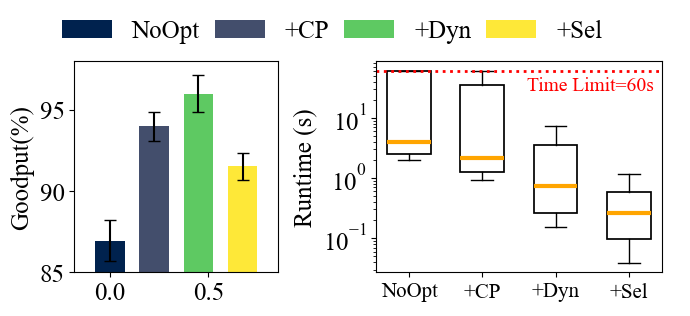

In [29]:
#### Trimmed box plot

fig = plt.figure(figsize=(7, 3))
axs = fig.subplots(1, 2, gridspec_kw={"width_ratios": [1, 1.4]})

###################################
# LEFT: bar chart (unchanged except tight x-limits)
ax = axs[0]
barWidth = 0.15
xvals = np.arange(0, 4) * barWidth * 1.5
KEY = "attainment_rate"

ax.bar(
    xvals[0],
    [final_datapoints["NoOpt"][KEY].mean],
    yerr=final_datapoints["NoOpt"][KEY].sd,
    capsize=4,
    color=colormap["NoOpt"],
    label="NoOpt",
    width=barWidth,
)
ax.bar(
    xvals[1],
    [final_datapoints["+CP"][KEY].mean],
    yerr=final_datapoints["+CP"][KEY].sd,
    capsize=4,
    color=colormap["+CP"],
    label="+CP",
    width=barWidth,
)
ax.bar(
    xvals[2],
    [final_datapoints["+Dyn"][KEY].mean],
    yerr=final_datapoints["+Dyn"][KEY].sd,
    capsize=4,
    color=colormap["+Dyn"],
    label="+Dyn",
    width=barWidth,
)
ax.bar(
    xvals[3],
    [final_datapoints["+Sel"][KEY].mean],
    yerr=final_datapoints["+Sel"][KEY].sd,
    capsize=4,
    color=colormap["+Sel"],
    label="+Sel",
    width=barWidth,
)

ax.set_ylim(85, 98)
ax.set_ylabel("Goodput(%)", fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=18)

# tighten horizontal space for the bar axis
ax.set_xlim(xvals[0] - barWidth * 1.2, xvals[-1] + barWidth * 1.2)
ax.margins(x=0)

plt.legend(
    loc="lower right",
    fontsize=14,
    ncol=3,
    columnspacing=1,
    frameon=False,
    bbox_to_anchor=(1.1, 1),
)

###################################
# RIGHT: boxplot (white interior, thick median, small side padding)
ax = axs[1]

box_data = [v for k, v in timings.items()]
box_labels = [k for k, v in timings.items()]
n = len(box_data)

# positions spaced by 1.0 (can shrink if you want boxes closer)
positions = np.arange(n)
box_width = 0.6

# style properties
boxprops = dict(facecolor="white", edgecolor="black", linewidth=1.25)
medianprops = dict(color="orange", linewidth=3)  # thick median
whiskerprops = dict(color="black", linewidth=1.0)
capprops = dict(color="black", linewidth=1.0)
flierprops = dict(
    marker=".", markeredgecolor="black"
)  # unused here because showfliers=False

bp = ax.boxplot(
    box_data,
    labels=box_labels,
    whis=(10, 90),
    showfliers=False,
    widths=box_width,
    positions=positions,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    flierprops=flierprops,
)

ax.set_yscale("log")
ax.set_ylabel("Runtime (s)", fontsize=18)
ax.tick_params(axis="y", which="major", labelsize=18)
ax.tick_params(axis="x", which="major", labelsize=15)

# Add a small horizontal padding so boxes don't touch the axis edges
side_padding = 0.5 * box_width + 0.15  # tweak 0.15 if you want more/less padding
ax.set_xlim(positions[0] - side_padding, positions[-1] + side_padding)
ax.margins(x=0)

# horizontal reference line
ax.axhline(y=60, color="r", linestyle=":", linewidth=2)

# place the text so it stays inside the x-limits and near the line.
# choose an x just left of the rightmost box inside the padding
x_text = positions[-1] - min(
    0.3, 0.25 * (positions[-1] - positions[0])
)  # conservative offset
# but ensure it is inside the axes:
x_left, x_right = ax.get_xlim()
x_text = min(
    max(x_text, x_left + 0.25 * (x_right - x_left)), x_right - 0.25 * (x_right - x_left)
)

# place text at data y=60 but slightly above the line so it's readable (use factor in log space)
# using a small multiplier keeps it visible across log scale ranges
y_text = 60 * 0.4
ax.text(
    x_text, y_text, "Time Limit=60s", color="r", fontsize=14, ha="center", va="bottom"
)

###################################
# figure-level legend (from left axis)
lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(
    lines,
    labels,
    fontsize=18,
    ncol=5,
    columnspacing=0.6,
    frameon=False,
    bbox_to_anchor=(0.9, 1.08),
)

# reduce whitespace between subplots
fig.subplots_adjust(wspace=0.25)

fig.tight_layout()
fig.savefig("optimization_passes.pdf", dpi=300, pad_inches=0.02, bbox_inches="tight")

In [15]:
spark_sched = {
    "TPC-H": to_s(
        [2918,24842,1727,21593,18833,4677,1781,2656,2252,21180,39002,24908,3864,23869,23041,40618,44353,64108,115715,106233,184735,11771,96687,90572,27405,79457,74491,65287,39150,120715,63468,92017,72058,110822,213545,38425,152461,45174,66524,25465,46808,10136,160947,147818,174777,276702,2134502,182192,292802,2119757,1357621,398807,141113,1638050,193096,112701,121326,3159,13085,25736,3730,25324,2337,42805,6048,24151,51502,1366,24227,22843,14276,47477,5362,7578,7204,23936,73355,59368,49798,62027,139329,133340,25513,148021,84357,82095,32040,127630,161053,212925,214621,322932,765056,311246,188223,94080,66537,37854,62715,57630]
    ),
    "Alibaba": to_s(
    [17502,13979,38720,11792,12920,69178,113763,33983,21607,146193,27597,21595,30448,17909,25312,17843,17340,7164,13834,43167,8487,25289,122387,311316,50176,34574,24787,12297,25857,17419,76731,79298,10445,27610,90798,23699,309443,10346,27193,33957,78249,73845,30744,46096,114375,405363,35392,66213,152721,214004,778900,454161,55928,417900,41389,113072,126800,177994,28196,411633,13250,1029532,35360,54712,391679,91499,766635,650782,1237996,1086762,146059,294153,168148,617467,474520,513893,286052,1693118,3752455,546455,938405,9102164,869957,593520,410725,1248732,1577707,838082,32265,214689,102666,743182,2185412,89511,143655,181875,571981,71360,16649,567567,193999,128680,63472,92622,24210,45631,573411,440913,71486,425308,514139,589109,401842,1066991,1288450,580353,379150,202423,99341,991232,180283,402475,365479,1509807,219107,51765,1159190,470307,92697,348839,1201931,152183,919067,484296,316088,269893,451010,77267,767614,234065,179452,92162,960049,172753,701866,124133,85663,239741,50352,311358,58529,147084,427680,425119,327016,88162,16963,61505,329124,39568,146376,256549,40489,274800,70916,30898,36510,135443,35971,300250,71551,466218,143204,70725,109217,157012,64057,36174,97587,16465649,9104345,1646181,1076227,1454002,57232,281042,83327,38607,766331,370591,154625,136514,98136,378876,518385,656561,45116,313163,399270,341237,143629,213436,292894,516005,303022,259075,200647,58209,1053182,203504,529070,381439,578759,277464,731351,327250,918906,369145,1035051,227651,449163,876198,408326,132082,282560,298964,501084,647961,1973812,1772600,734957,259170,1413450,619089,203991,893679,867479,576887,325381,175773,577836,301632,152834,312604,476197,176471,282424,1016794,352622,797814,2150991,819456,1478623,1164158,825253,1493613,416430,896158,1636281,1366147,386098,1409897,1347722,835697,1811298,119725,370290,169617,573965,444655,547726,315710,155328,64359,202937,330364,123242,537374,212370,1697725,453084,674497,191149,330108,323862,59019,568757,208990,146183,886901,157196,883546,105560,178551,550478,198973,1579981,1470917,589821,302584,387998,1120241,352172,50789,27310,238799,148258,112034,71828,183933,51753,820787,98969,650376,1011121,83163,549823,75816,60390,65909,33562,1542000,420739,285819,760471,649088,396057,1162177,659720,199891,339733,2021402,278753,345786,1404834,247192,165010,470328,243980,683032,1383554,646497,245177,637104,144708,315210,436623,898909,114113,241991,39184,228797,183532,420582,175686,312463,172678,288317,131456,321605,41921,154559,357457,177811,43703,417362,128810,442676,249007,1694915,263926,119776,418280,140714,246294,362877,135343,241340,325022,401719,243066,56592,1032381,666446,680292,535859,378914,219810,218442,383751,1163719,107358,98659,126430,352158,1250392,183136,314643,1326893,641638,65501,26973,396059,86755,52395,356903,114212,139286,35073,39391,167006,90604,218177,130841,262619,93336,39474,229446,65556,124813,225212,57737,31313,57431,20909,137126,245018,11317,187852,74633,188502,61092,32258,412498,462821,44828,70202,576069,1086407,114616,411635,16919,112094,48783,320214,284534,76894,47642,84097,143144,289488,181263,40121,104208,31052,62615,23383,186273,21907,43005,29688,48439,41254,67642,911235,115685,1068789,307708,334613,952678,89433,467333,420646,776651,588218,62165,217775,262349,238606,615815,280489,292638,101252,303466,151031,6068294,252007,599561,473222,1425359,897015,449729,265517,783477,105497,12450361,6888256,1088594,938940,1670704,106904,406442,280919,258781,3312250,1091781,600244,304602,1164300,419227,2105163,1175237,2141033,1276249,3134780,984703,874742,479462,108347,127817,631293,137894,107499,129398,26970,328847,105765,927298,167239,118627,113269,126163,20593,55743,14411,151744,30246,27200,120142,12359,352362,93151,62503,260250,37823,691402,1228057,172863,436009,1487260,635708,458702,1121762,2854436,4756677,1504752,411648,277955,147505,41004,201439,749160,128093,342117,339570,112294,214873,29815,173917,31432,41514,76120,469511,112035,285340,132444,295390,807858,969066,68733,305850,165599,339670,143271,95403,932497,1922866,739387,140939,736592,120767,529364,1706891,2380147,1286027,796834,31457,573909,27825,961941,281346,31488,68701,314836,333160,687591,87010,113750,29105,35416,82012,81777,60484,53994,35117,84312,24091,139386,99487,139729,94682,18914,48170,78015,66952,93377,294913,174784,60339,521459,70873,209466,270498,128190,449955,1841758,688268,1120997,660450,1571880,201719,870642,154997,739409,57976,68646,709081,449486,333785,119059,111916,1485569,159183,124065,460887,29817,36376,475916,549505,103879,47153,160958,905122,157646,141334,702286,133892,106508,20398,39310,170073,35980,34234,279641,40756,707638,216497,89553,27723,127893,210276,102965,138538,132228,123817,340319,33470,74514,63927,554291,93458,18338,107442,6742648,59471,692438,523518,630628,801646,667348,226726,786708,2781620,1175309,1409655,118315,1005846,178459,581847,1161487,10295,288493,66786,19323,413712,96177,49257,29416,91185,52400,289059,140444,452311,29358,65159,543525,158638,288099,370523,452458,132443,90045,823076,173640,483500,3607872,264012,1520135,916533,340153,892139,1524861,1146821,747907,1242019,1008596,683374,386593,93601,98315,91000,373448,454045,479793,49592,151808,849481,41412,80086,118682,59065,87304,248400,87869,131502,95722,304949,342242,48382,33452,176064,107445,421890,90439,151055,68202,202488,76670,349295,100652,296550,388332,521630,118658,22840,260988,309336,511373,419737,53773,180756,857510,398333,1987853,160048,1328387,96759,78191,345193,129456,554027,278237,46566,91764,1163611,60816,368182,419738,71815,158558,339492,147523,456631,128947,77459,998905,91753,186839,228071,187466,194490,454581,372621,1924432,1274018,1491876,1701031,600750,626180,4422966,1052281,196908,2785839,1590328,3207999,5590497,673733,466902,531764,806037,785907,116592,871909,172142,498458,1194440,191842,136081,291712,33983,585919,507781,538220,305595,165401,191935,113588,148285,200943,956088,132771,84211,389828,91599,197418,106100,438783,158630,131027,635314,1240615,663711,315755,1317177,413842,1053324,533409,138297,204015,154190,2030032,190730,452731,4139047,1198488,2228817,1442625,1261558,628046,580712,532731,1338974,77510,3531637,489904,434636,111048,754367,573532,627017,3213638,737417,439241,83283,36474,231914,509102,37341,27609,93541,34452,549144,1344762,134042,90889,177228,245124,47171,198279,69328,556003,475088,67217,355858,363607,23910,280671,456426,82665,203957,1722065,315488,363695,891092,244954,932791,279551,120810,357229,731562,52413,522985,100295,662739,184388,1174283,270651,942789,707954,1035186,1232306,890765,1425912,2592330,1403626,3561168,1205662,767842,1839975,178591,395722,529452,664199,219487,310692,75827,807845,488151,615668,551144,242702,963148,338161,843056,301528,696732,696654,1159109,388036,272086,57697,147086,13729,11942,18248,18140,24978,174960,8176]
    )
}

In [16]:
len(spark_sched["TPC-H"])

100

/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_75584/2472738505.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


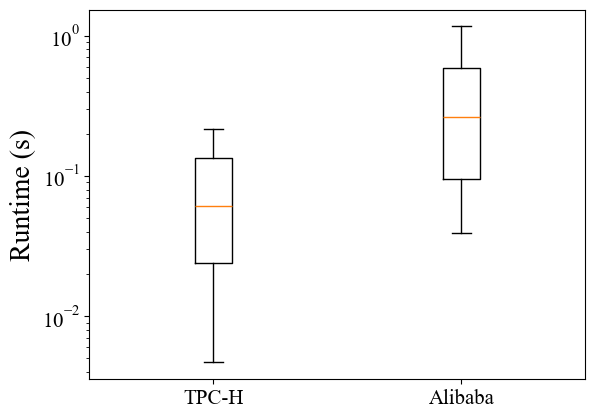

In [17]:
plt.boxplot(
   [v for k,v in spark_sched.items()], labels=[k for k,v in spark_sched.items()], whis=(10, 90), showfliers=False)
# plt.xlabel("DSched's Schedulers", fontsize=20)
plt.yscale("log")
plt.ylabel("Runtime (s)", fontsize=20)
# plt.xlabel("Time Limit on Scheduler (s)", fontsize=20)
# plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
# plt.xticks(rotation=15)
plt.tick_params(axis='both', which='major', labelsize=15)

In [134]:
np.percentile(np.array(spark_sched["DSched-Spark"]),95)

0.417119449999999

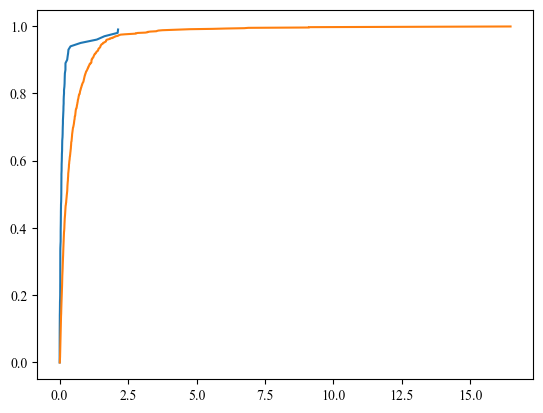

In [142]:
def cdf(x):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x, y
x,y = cdf(spark_sched["DSched-Spark"])
x1,y1 = cdf(spark_sched["DSched-Alibaba"])

# plt.axhline(y=0.95, color='r', linestyle=':', linewidth=2)
# plt.axvline(x=0.417119449999999, color='r', linestyle=':', linewidth=2)


plt.plot(x,y)
plt.plot(x1,y1)


In [1]:
!pwd

/data/sukritk/scheduling/erdos-scheduling-simulator/results/opt_plot


In [7]:
!ls /data/dgarg/

alibaba_trace_replay_dagsched_c1_seed1.log  DAGSched.tar.gz  spark_related


In [9]:
from pathlib import Path
import shutil

src = Path('/data/dgarg/DAGSched.tar.gz')
dst = Path.cwd() / src.name  # Puts it in the current working directory

shutil.copy(src, dst)

PosixPath('/data/sukritk/scheduling/erdos-scheduling-simulator/results/opt_plot/DAGSched.tar.gz')